<a href="https://colab.research.google.com/github/AzadehZahedi/Data-Analysis/blob/main/Electricity_Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electricity Consumption Analysis – National Energy Dataset (Iran)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data
df = pd.read_excel('Report.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   #                                             5853 non-null   int64  
 1   تاریخ                                         5853 non-null   object 
 2   زمان                                          5853 non-null   object 
 3   نیاز مصرف برق در پیک                          5819 non-null   float64
 4   نیاز مصرف برق در پیک (سال گذشته)              5056 non-null   float64
 5   ذخیره نیروگاه ها                              5853 non-null   object 
 6   مصرف برق صنایع                                5853 non-null   object 
 7   تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)  5853 non-null   int64  
 8   میانگین فرکانس                                5853 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 411.7+ KB


گزارش وضعیت شبکه برق کشور در شرکت مدیریت شبکه برق کشور، داده‌های زیر را در قالب یک جدول به صورت روزانه گزارش می‌دهد

در این جدول مصرف برق در هر ‌شبانه‌روز در دو زمان در ردیف‌ های جدول ثبت شده است

مشاهده اول مربوط به زمان اوج مصرف در طول روز (پیک روز) و مشاهده دوم مربوط به اوج مصرف در طول شب (پیک شب) است

داده‌هایی که در هر مشاهده در جدول آمده ناظر به لحظه (واحد زمان) است به همین دلیل مربوط به «توان» است و با واحد «مگاوات» سنجیده می‌شود

توصیفی از هر یک از ستون‌های جدول


p:
نیاز مصرف در پیک = مقدار مصرف در لحظه پیک

p_lastyear:
نیاز مصرف در پیک در سال گذشته = نیاز مصرف در زمان مشابه در سال قبل

p_reserve:
ذخیره نیروگاه‌ها = برای اطمینان از پوشش نیازِ مصرف کشور و تامین فرکانس مطلوب تولید همیشه اندکی بیشتر از پیش‌بینیِ مصرف برنامه‌ریزی می‌شود. از این مقدارِ مازاد که غالباً به صورت سوخت در نیروگاه‌های حرارتی کنار گذاشته می‌شود با عنوان ذخیره نیروگاه‌ها یاد می‌شود
 = تفاضل توان قابل تولید و توان تولید شده در لحظۀ پیک

p_industries:
مصرف برق صنایع = بخشی از برق که به صورت اختصاصی یا اشکال دیگر برای صنایع تولید می‌شود

p_renewable:
تولید نیروگاه‌های تجدیدپذیر= مقدار تولید در نیروگاه‌های برق‌آبی (سدها)، بادی و خورشیدی

freq_avg:
میانگین فرکانس = ایران مانند کشورهای آسیا، آفریقا، اروپا و آمریکای جنوبی از استاندارد ولتاژ 220 و فرکانس 50 هرتز استفاده می‌کند. میانگین فرکانسی که در جدول ثبت می‌شود مقداری است که در آن لحظه محقق شده است

In [4]:
# rename the columns
df.rename(columns={'#': 'r', 'تاریخ': 'date', 'زمان': 'time', 'نیاز مصرف برق در پیک': 'p', 'نیاز مصرف برق در پیک (سال گذشته)': 'p_lastyear',
                    'ذخیره نیروگاه ها': 'p_reserve', 'مصرف برق صنایع': 'p_industries', 'تولید نیروگاه های تجدید پذیر (مجموع 24 ساعت)': 'p_renewable',
                      'میانگین فرکانس': 'freq_avg'}, inplace=True)

In [5]:
# change the type of two columns
df['p_reserve'] = df['p_reserve'].str.replace(',', '').astype(int)
df['p_industries'] = df['p_industries'].str.replace(',', '').astype(int)

In [6]:
# define new columns based on date
df['year'] = df.date.str[:4].astype(int)
df['month'] = df.date.str[5:7].astype(int)
df['day'] = df.date.str[8:10].astype(int)
df['n_days'] = df.day + np.where(df.month > 6, ((df.month)-1) * 30 + 6, ((df.month)-1) * 31) # number of day over a year
df['date_num'] = df['year'] + df['n_days'] / 366.1 # number of days in the year as a decimal

In [7]:
df.head()

,r,date,time,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,n_days,date_num
0,1,1404/01/27,19:47,50290.0,45281.0,946,7770,8090,49.88,1404,1,27,27,1404.073750
1,2,1404/01/27,12:55,49226.0,44808.0,526,7892,8090,49.88,1404,1,27,27,1404.073750
2,3,1404/01/26,19:41,51158.0,46552.0,296,7536,9108,49.87,1404,1,26,26,1404.071019
3,4,1404/01/26,12:30,49748.0,44532.0,337,6828,9108,49.87,1404,1,26,26,1404.071019
4,5,1404/01/25,19:28,51302.0,46361.0,291,7517,8342,49.89,1404,1,25,25,1404.068287


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r             5853 non-null   int64  
 1   date          5853 non-null   object 
 2   time          5853 non-null   object 
 3   p             5819 non-null   float64
 4   p_lastyear    5056 non-null   float64
 5   p_reserve     5853 non-null   int64  
 6   p_industries  5853 non-null   int64  
 7   p_renewable   5853 non-null   int64  
 8   freq_avg      5853 non-null   float64
 9   year          5853 non-null   int64  
 10  month         5853 non-null   int64  
 11  day           5853 non-null   int64  
 12  n_days        5853 non-null   int64  
 13  date_num      5853 non-null   float64
dtypes: float64(4), int64(8), object(2)
memory usage: 640.3+ KB


In [9]:
# missing values in each column
df.isnull().sum()

,0
r,0
date,0
time,0
p,34
p_lastyear,797
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


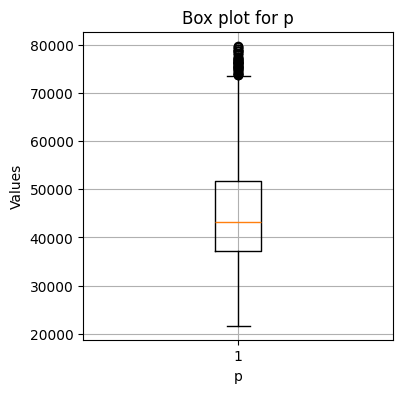

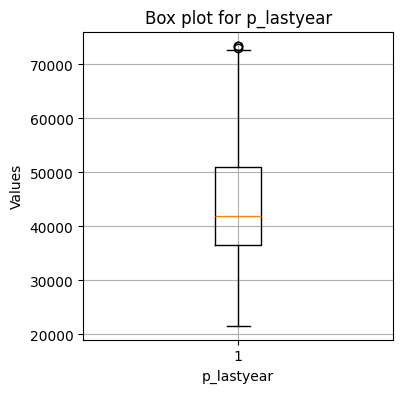

In [10]:
# handeling the missing values

# outliers deduction for these two columns
columns_with_nan = ['p', 'p_lastyear']
for col in columns_with_nan:
  Q1, Q2, Q3 = df[col].quantile([0.25, 0.5, 0.75])
  IQR = Q3 - Q1

  plt.figure(figsize=(4,4))
  plt.boxplot(df[col].dropna())
  plt.title(f'Box plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Values')
  plt.grid(True)  # نمایش گرید برای بهتر شدن مشاهده نقاط
  plt.show()

In [11]:
df.groupby(['year', 'month'])['p'].median().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26113.0
1396,30061.5,38495.0,46223.0,49863.0,52163.5,49008.5,37791.5,33977.0,33472.5,32901.0,33547.0,32948.5
1397,33177.0,37279.0,44368.0,53433.0,52611.0,47277.0,39676.0,32247.5,32032.0,33032.0,32513.5,33246.5
1398,30543.5,38695.0,47371.0,53893.5,53006.0,49243.5,42638.0,34528.0,34418.0,35294.0,35619.5,35165.0
1399,31271.0,39407.0,51442.0,55404.5,55968.5,51445.5,43097.5,37150.0,37544.0,38066.0,38178.5,37998.0
1400,38105.0,46412.5,55244.0,60805.5,60398.0,56778.5,44407.0,39712.0,38911.5,38954.5,39467.0,39878.0
1401,41087.0,44383.0,54813.5,62726.0,63747.0,57196.0,48940.0,42256.0,40590.5,41223.0,41657.0,41091.0
1402,39167.0,48185.0,59333.0,65639.0,68174.5,63500.0,51057.0,43918.0,41941.5,42768.0,42908.0,43095.5
1403,40923.0,48361.5,61924.0,70613.0,74294.0,66946.5,53397.0,45867.5,44184.5,44414.0,44358.5,44704.0


In [12]:
df.groupby(['year', 'month'])['p_lastyear'].median().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,30303.0,38554.0,46223.0,49863.0,52157.0,49008.5,37720.0,33977.0,33444.0,32891.0,33547.0,32948.5
1398,33177.0,37268.0,44368.0,53433.0,52552.0,47277.0,39676.0,32248.0,32032.0,33032.0,32513.5,33290.0
1399,30639.0,38563.0,47468.0,53893.5,53006.0,49243.5,42638.0,34528.0,34418.0,35294.0,35619.5,35165.0
1400,31271.0,39407.0,51442.0,55404.5,55968.5,51445.5,41734.0,37150.0,37544.0,38066.0,38178.5,38067.5
1401,38105.0,46412.5,55244.0,60805.5,60398.0,56778.5,44407.0,39712.0,38911.5,38954.5,39467.0,39878.0
1402,41087.0,44383.0,54813.5,62734.5,63747.0,57196.0,48940.0,42256.0,40590.5,41223.0,41657.0,41091.0
1403,39167.0,48185.0,59333.0,65639.0,68174.5,63500.0,51057.0,43918.0,41941.5,42768.0,42908.0,43095.5


In [13]:
for col in columns_with_nan:
  df[col] = df.groupby(['year', 'month'])[col].transform(lambda x: x.fillna(x.median()))

In [14]:
df.isnull().sum()

,0
r,0
date,0
time,0
p,0
p_lastyear,724
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


In [17]:
print(df)

         r        date   time        p  p_lastyear  p_reserve  p_industries  \
0        1  1404/01/27  19:47  50290.0     45281.0        946          7770   
1        2  1404/01/27  12:55  49226.0     44808.0        526          7892   
2        3  1404/01/26  19:41  51158.0     46552.0        296          7536   
3        4  1404/01/26  12:30  49748.0     44532.0        337          6828   
4        5  1404/01/25  19:28  51302.0     46361.0        291          7517   
...    ...         ...    ...      ...         ...        ...           ...   
5848  5849  1396/01/02  12:09  22818.0         NaN       4740          3599   
5849  5850  1396/01/01  19:53  26416.0         NaN       3140          3639   
5850  5851  1396/01/01  12:26  22068.0         NaN       4690          3632   
5851  5852  1395/12/30  19:53  26639.0         NaN       5671          3908   
5852  5853  1395/12/30  11:56  25587.0         NaN       4859          3891   

      p_renewable  freq_avg  year  month  day  n_da

In [18]:
# remove the data before 1397 and after 1403 sine we do not have enouph info
df = df[(df.year >= 1397) & (df.year <= 1403)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5075 entries, 54 to 5128
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   r             5075 non-null   int64  
 1   date          5075 non-null   object 
 2   time          5075 non-null   object 
 3   p             5075 non-null   float64
 4   p_lastyear    5075 non-null   float64
 5   p_reserve     5075 non-null   int64  
 6   p_industries  5075 non-null   int64  
 7   p_renewable   5075 non-null   int64  
 8   freq_avg      5075 non-null   float64
 9   year          5075 non-null   int64  
 10  month         5075 non-null   int64  
 11  day           5075 non-null   int64  
 12  n_days        5075 non-null   int64  
 13  date_num      5075 non-null   float64
dtypes: float64(4), int64(8), object(2)
memory usage: 594.7+ KB


In [19]:
df.isnull().sum()

,0
r,0
date,0
time,0
p,0
p_lastyear,0
p_reserve,0
p_industries,0
p_renewable,0
freq_avg,0
year,0


In [20]:
df['p_others'] = df['p'] - df['p_industries']

In [21]:
# Industry consumption share
df['p_industries_share'] = (df['p_industries'] / df['p']) * 100

In [22]:
# others consumption share
df['p_others_share'] = (df['p_others'] / df['p']) * 100

In [23]:
# renewable produce share
df['p_renewable_share'] = (df['p_renewable'] / df['p']) * 100

In [24]:
print(df)

         r        date   time        p  p_lastyear  p_reserve  p_industries  \
54      55  1403/12/30  19:09  44704.0     43095.5       1354          6965   
55      56  1403/12/30  12:03  44704.0     43095.5       1032          6727   
56      57  1403/12/29  19:03  41429.0     38845.0       1470          6937   
57      58  1403/12/29  12:38  38049.0     35715.0        883          6780   
58      59  1403/12/28  18:48  42456.0     41147.0        866          6384   
...    ...         ...    ...      ...         ...        ...           ...   
5124  5125  1397/01/03  13:25  25727.0     23705.0       5647          4138   
5125  5126  1397/01/02  20:43  29652.0     26645.0       3196          3909   
5126  5127  1397/01/02  13:47  25686.0     22818.0       5064          4215   
5127  5128  1397/01/01  19:14  28861.0     26416.0       3709          3964   
5128  5129  1397/01/01  12:38  24935.0     22068.0       4948          3923   

      p_renewable  freq_avg  year  month  day  n_da

In [25]:
mean_industry_shre = df.groupby('year')['p_industries_share'].mean()
mean_industry_shre

,p_industries_share
year,
1397,11.075715
1398,11.060837
1399,11.578353
1400,10.658970
1401,10.771645
1402,11.705722
1403,11.184961


In [26]:
mean_others_shre = df.groupby('year')['p_others_share'].mean()
mean_others_shre

,p_others_share
year,
1397,88.924285
1398,88.939163
1399,88.421647
1400,89.341030
1401,89.228355
1402,88.294278
1403,88.815039


In [27]:
mean_renew_shre = df.groupby('year')['p_renewable_share'].mean()
mean_renew_shre

,p_renewable_share
year,
1397,0.000000
1398,6.781964
1399,10.386613
1400,9.647438
1401,9.602828
1402,10.557761
1403,11.399024


In [36]:
# Combine both Series into a single DataFrame
df_contribution = pd.DataFrame({
    'Year': mean_industry_shre.index,
    'P': df.groupby('year')['p'].mean(),
    'Industry': mean_industry_shre.values,
    'Others': mean_others_shre.values,
    'Renewable': mean_renew_shre
})
df_contribution = df_contribution.reset_index(drop=True)

print(df_contribution)

   Year             P   Industry     Others  Renewable
0  1397  39438.237171  11.075715  88.924285   0.000000
1  1398  40962.524205  11.060837  88.939163   6.781964
2  1399  43073.639276  11.578353  88.421647  10.386613
3  1400  46672.160665  10.658970  89.341030   9.647438
4  1401  48293.723288  10.771645  89.228355   9.602828
5  1402  50684.218107  11.705722  88.294278  10.557761
6  1403  53459.577869  11.184961  88.815039  11.399024


In [37]:
# Melt into long format for Seaborn
df_contribution_melted = df_contribution.melt(id_vars='Year',
                         value_vars=['Industry', 'Others', 'Renewable'],
                         var_name='Category', value_name='Share')
df_contribution_melted

,Year,Category,Share
0,1397,Industry,11.075715
1,1398,Industry,11.060837
2,1399,Industry,11.578353
3,1400,Industry,10.658970
4,1401,Industry,10.771645
5,1402,Industry,11.705722
6,1403,Industry,11.184961
7,1397,Others,88.924285
8,1398,Others,88.939163
9,1399,Others,88.421647


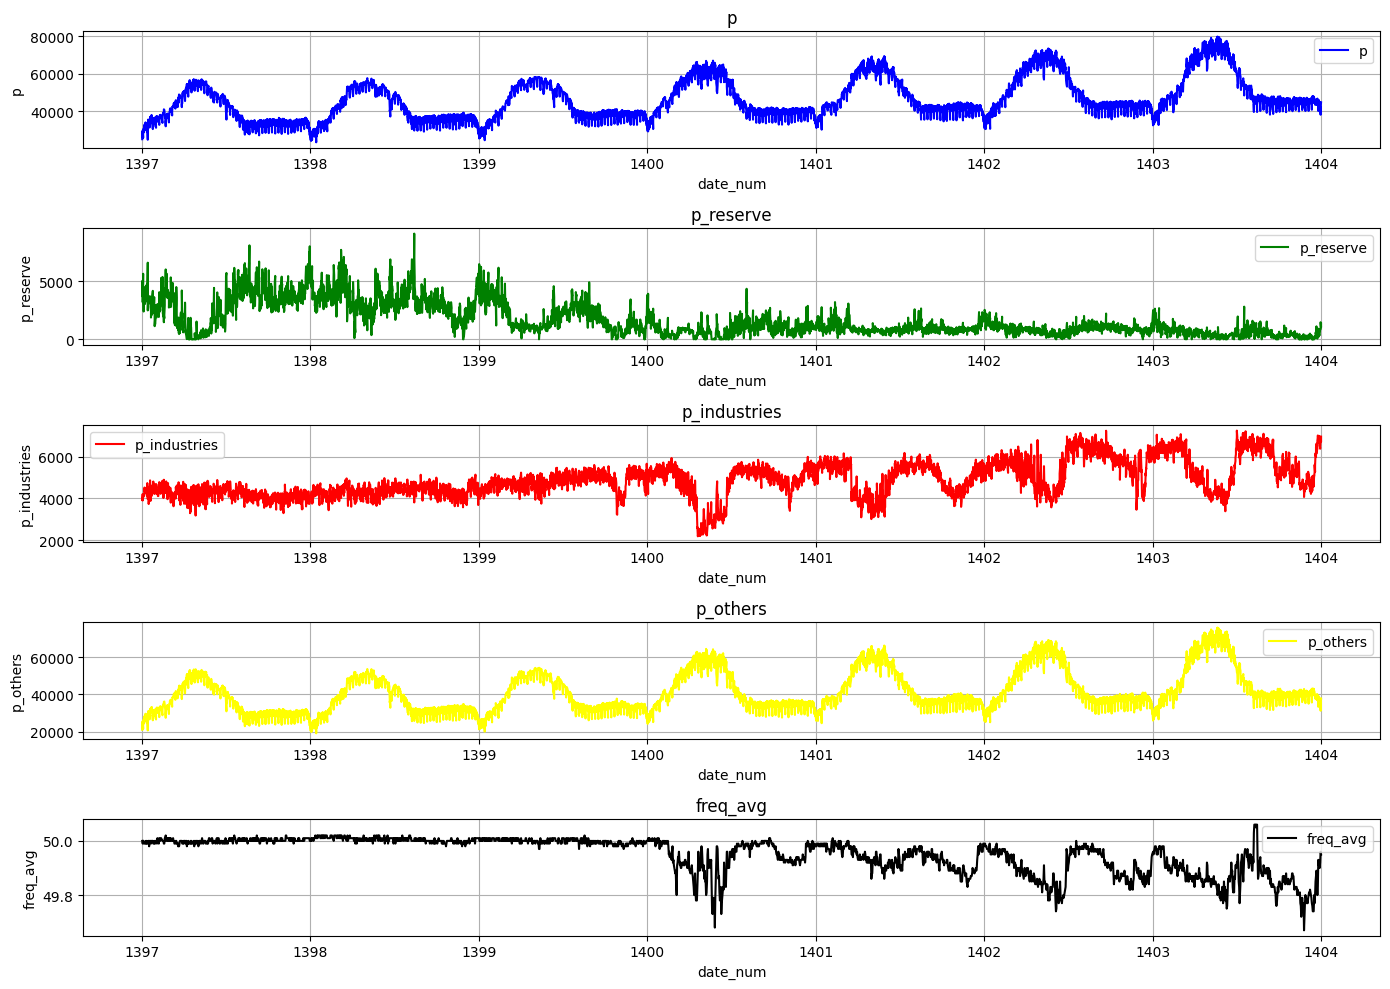

In [38]:
# visualize 5 important parameters over all days of years
plt.figure(figsize=(14,10))

# plt.subplot(nrows, ncols, index)
# nrows: number of rows in the grid (fix)
# ncols: number of columns in the grid (fix)
# index: position of the plot (starts at 1)

# plt.plot(x, y, label='Line Label', color='blue', linestyle='-', marker='o')

# p
plt.subplot(5,1,1)
plt.plot(df['date_num'], df['p'], label = 'p', color = 'blue')
plt.title('p')
plt.xlabel('date_num')
plt.ylabel('p')
plt.grid(True)
plt.legend()

# p_reserve
plt.subplot(5,1,2)
plt.plot(df['date_num'], df['p_reserve'], label = 'p_reserve', color = 'green')
plt.title('p_reserve')
plt.xlabel('date_num')
plt.ylabel('p_reserve')
plt.grid(True)
plt.legend()

# p_industries
plt.subplot(5,1,3)
plt.plot(df['date_num'], df['p_industries'], label = 'p_industries', color = 'red')
plt.title('p_industries')
plt.xlabel('date_num')
plt.ylabel('p_industries')
plt.grid(True)
plt.legend()

# p_others
plt.subplot(5,1,4)
plt.plot(df['date_num'], df['p_others'], label = 'p_others', color = 'yellow')
plt.title('p_others')
plt.xlabel('date_num')
plt.ylabel('p_others')
plt.grid(True)
plt.legend()

# freq_avg
plt.subplot(5,1,5)
plt.plot(df['date_num'], df['freq_avg'], label = 'freq_avg', color = 'black')
plt.title('freq_avg')
plt.xlabel('date_num')
plt.ylabel('freq_avg')
plt.grid(True)
plt.legend()

# display all figures
plt.tight_layout()
plt.show()

# What is the amount of the power Consumption in holidays and non-holidays?
To answer, we first need filter the initial df based on working hour and working days.


In [43]:
# filter df according to office hour
df['hour']= df['time'].str[:2].astype(int)
df_office_hours = df[df['hour'] < 17]
df_office_hours.drop(columns=['r', 'time'], inplace=True)

<ipython-input-43-4c7a524e3af7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_office_hours.drop(columns=['r', 'time'], inplace=True)


In [48]:
df_office_hours

,date,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,n_days,date_num,p_others,p_industries_share,p_others_share,p_renewable_share,hour
55,1403/12/30,44704.0,43095.5,1032,6727,7026,49.95,1403,12,30,366,1403.999727,37977.0,15.047870,84.952130,15.716714,12
57,1403/12/29,38049.0,35715.0,883,6780,6422,49.96,1403,12,29,365,1403.996995,31269.0,17.819128,82.180872,16.878236,12
59,1403/12/28,40255.0,38831.0,848,6439,5780,49.92,1403,12,28,364,1403.994264,33816.0,15.995529,84.004471,14.358465,12
61,1403/12/27,41525.0,39766.0,350,6696,5313,49.90,1403,12,27,363,1403.991532,34829.0,16.125226,83.874774,12.794702,12
63,1403/12/26,42411.0,40938.0,358,6705,6082,49.92,1403,12,26,362,1403.988801,35706.0,15.809578,84.190422,14.340619,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,1397/01/06,29820.0,24372.0,4013,4525,0,49.99,1397,1,6,6,1397.016389,25295.0,15.174380,84.825620,0.000000,13
5121,1397/01/05,28662.0,24671.0,4493,4215,0,49.99,1397,1,5,5,1397.013657,24447.0,14.705882,85.294118,0.000000,13
5124,1397/01/03,25727.0,23705.0,5647,4138,0,50.00,1397,1,3,3,1397.008194,21589.0,16.084269,83.915731,0.000000,13
5126,1397/01/02,25686.0,22818.0,5064,4215,0,49.99,1397,1,2,2,1397.005463,21471.0,16.409717,83.590283,0.000000,13


In [44]:
d_calender = pd.read_excel('persianCalendar.xlsx')

In [47]:
d_calender

,date_pr,weekday_fa,holiday_inCal,workingday_inCal,date_gr,weekday_en
0,1397/01/01,چهارشنبه,1,0,2018-03-21,Wednesday
1,1397/01/02,پنجشنبه,1,0,2018-03-22,Thursday
2,1397/01/03,جمعه,1,0,2018-03-23,Friday
3,1397/01/04,شنبه,1,0,2018-03-24,Saturday
4,1397/01/05,یکشنبه,0,1,2018-03-25,Sunday
...,...,...,...,...,...,...
1367,1400/09/26,جمعه,1,0,2021-12-17,Friday
1368,1400/09/27,شنبه,0,1,2021-12-18,Saturday
1369,1400/09/28,یکشنبه,0,1,2021-12-19,Sunday
1370,1400/09/29,دوشنبه,0,1,2021-12-20,Monday


In [45]:
# merge two dataframe
DF = pd.merge(df_office_hours, d_calender, left_on='date', right_on='date_pr', how='left')
DF.dropna(subset = ['date_pr'], inplace=True)

In [46]:
DF

,date,p,p_lastyear,p_reserve,p_industries,p_renewable,freq_avg,year,month,day,...,p_industries_share,p_others_share,p_renewable_share,hour,date_pr,weekday_fa,holiday_inCal,workingday_inCal,date_gr,weekday_en
1184,1400/09/30,38134.0,37515.0,936,4871,4436,49.98,1400,9,30,...,12.773378,87.226622,11.632664,11,1400/09/30,سه شنبه,0.0,1.0,2021-12-21,Tuesday
1185,1400/09/29,37943.0,38063.0,1150,4653,3433,49.98,1400,9,29,...,12.263132,87.736868,9.047782,12,1400/09/29,دوشنبه,0.0,1.0,2021-12-20,Monday
1186,1400/09/28,39026.0,32867.0,121,5464,1961,49.99,1400,9,28,...,14.000922,85.999078,5.024855,11,1400/09/28,یکشنبه,0.0,1.0,2021-12-19,Sunday
1187,1400/09/27,39155.0,37020.0,418,5120,2635,49.98,1400,9,27,...,13.076235,86.923765,6.729664,11,1400/09/27,شنبه,0.0,1.0,2021-12-18,Saturday
1188,1400/09/26,33758.0,37695.0,362,5361,3641,49.99,1400,9,26,...,15.880680,84.119320,10.785592,12,1400/09/26,جمعه,1.0,0.0,2021-12-17,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,1397/01/06,29820.0,24372.0,4013,4525,0,49.99,1397,1,6,...,15.174380,84.825620,0.000000,13,1397/01/06,دوشنبه,0.0,1.0,2018-03-26,Monday
2529,1397/01/05,28662.0,24671.0,4493,4215,0,49.99,1397,1,5,...,14.705882,85.294118,0.000000,13,1397/01/05,یکشنبه,0.0,1.0,2018-03-25,Sunday
2530,1397/01/03,25727.0,23705.0,5647,4138,0,50.00,1397,1,3,...,16.084269,83.915731,0.000000,13,1397/01/03,جمعه,1.0,0.0,2018-03-23,Friday
2531,1397/01/02,25686.0,22818.0,5064,4215,0,49.99,1397,1,2,...,16.409717,83.590283,0.000000,13,1397/01/02,پنجشنبه,1.0,0.0,2018-03-22,Thursday


In [50]:
# adding half-holiday
DF.loc[(DF['weekday_en'] == 'Thursday') & (DF['holiday_inCal'] == 0) & (DF['workingday_inCal'] == 1), ['holiday_inCal', 'workingday_inCal']] = 0.5
DF.loc[(DF['month'] == 1) & (DF['day'] <= 13) & (DF['holiday_inCal'] == 0) & (DF['workingday_inCal'] == 1), ['holiday_inCal', 'workingday_inCal']] = 0.5

In [51]:
# filtering DF based on holiday and non-holiday days
holiday = DF[DF['holiday_inCal'] == 1]
workday = DF[DF['workingday_inCal'] == 1]
half_holiday = DF[DF['holiday_inCal'] == 0.5]

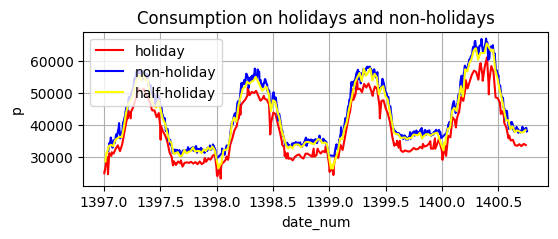

In [52]:
# visualize Consumption based on holiday & non-holiday
plt.figure(figsize=(6, 2))
plt.plot(holiday['date_num'], holiday['p'], color= 'red', label='holiday')
plt.plot(workday['date_num'], workday['p'], color='blue', label='non-holiday')
plt.plot(half_holiday['date_num'], half_holiday['p'], color='yellow', label='half-holiday')

plt.title('Consumption on holidays and non-holidays')
plt.xlabel('date_num')
plt.ylabel('p')
plt.legend()
plt.grid()
plt.show()

In [54]:
# ایجاد یک ستون جدید برای ذخیره مقدار درون‌یابی شده در روزهای غیرتعطیل
DF['p_working_interpolated'] = DF[DF['workingday_inCal'] == 1]['p'].interpolate(method='linear')

# ایجاد یک ستون جدید برای ذخیره مقدار درون‌یابی شده در روزهای تعطیل
DF['p_holiday_interpolated'] = DF[DF['workingday_inCal'] != 1]['p'].interpolate(method='linear')

# تجمیع بر اساس سال-ماه و محاسبه میانگین روزانه برای هر گروه
dfm = DF.groupby(['year', 'month']).agg({
    'p_working_interpolated': 'mean',
    'p_holiday_interpolated': 'mean'
}).reset_index()

In [56]:
# محاسبه تفاضل مصرف روزهای غیرتعطیل و تعطیل
# برآورد مصرف ادارات
dfm['p_difference'] = dfm['p_working_interpolated'] - dfm['p_holiday_interpolated']
dfm['ym_num'] = dfm['year'] + dfm['month']/13


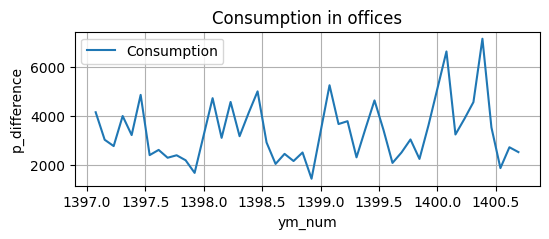

In [57]:
plt.figure(figsize=(6, 2))
plt.plot(dfm['ym_num'], dfm['p_difference'], label='Consumption')
plt.title('Consumption in offices')
plt.xlabel('ym_num')
plt.ylabel('p_difference')
plt.legend()
plt.grid()
plt.show()

In [58]:
# محاسبه سهم ادارات از کل مصرف به صورت درصدی
dfm['share_of_offices'] = (dfm['p_difference'] / dfm['p_working_interpolated']) * 100

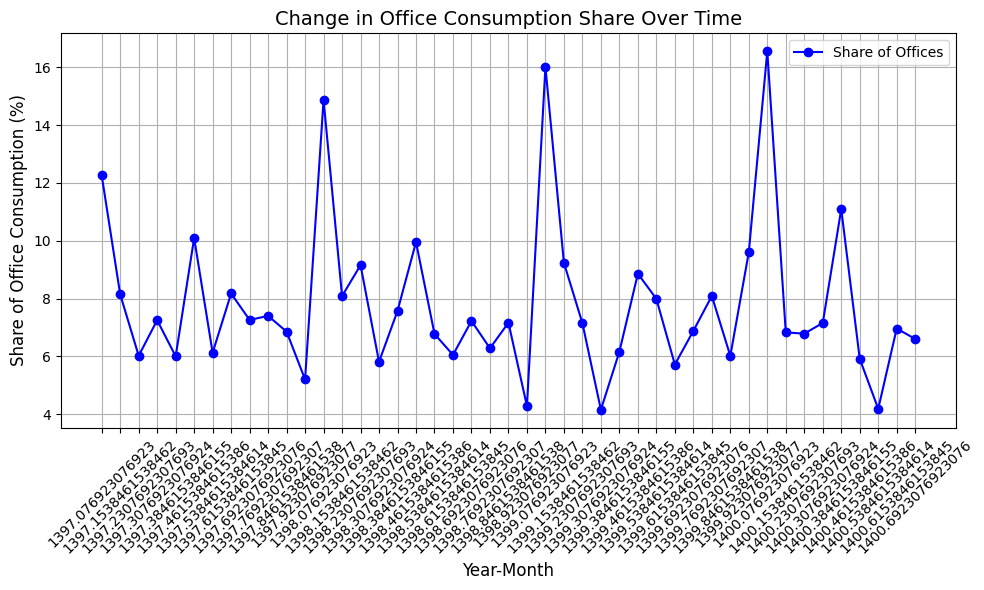

In [59]:
# ترسیم نمودار تغییرات سهم ادارات در طول زمان
plt.figure(figsize=(10,6))
plt.plot(dfm['ym_num'].astype(str), dfm['share_of_offices'], marker='o', color='b', label='Share of Offices')
plt.title('Change in Office Consumption Share Over Time', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Share of Office Consumption (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# So, as can be seen in working days the power Consumption increases deramatically.
# On the other hand, the half-holiday days have not a huge effect on power Consumption.

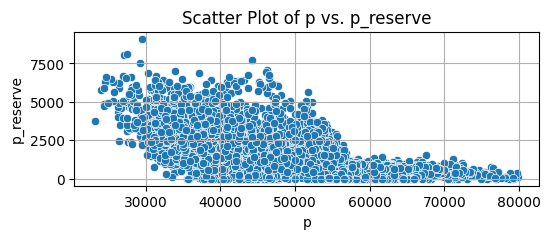

In [60]:
# Now, we want to answer the second question.
# When does power cut occur?
# To answer we visualize two main parameters: p_reserve and freq_avg.

# visualize p vs. p_reserve
plt.figure(figsize=(6,2))
sns.scatterplot(x='p', y='p_reserve', data=df)
plt.title('Scatter Plot of p vs. p_reserve')
plt.xlabel('p')
plt.ylabel('p_reserve')
plt.grid(True)
plt.show()
# So, The reserve of power decreases in different months in high amounts of consumption
# and sometimes becomes zero.

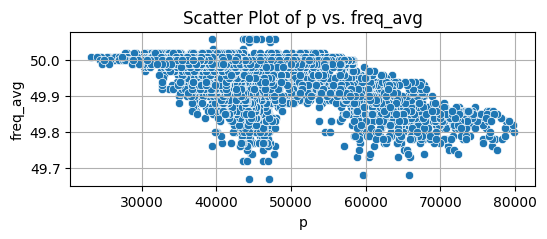

In [61]:
# visualize p vs. freq_avg
plt.figure(figsize=(6,2))
sns.scatterplot(x='p', y='freq_avg', data=df)
plt.title('Scatter Plot of p vs. freq_avg')
plt.xlabel('p')
plt.ylabel('freq_avg')
plt.grid(True)
plt.show()
# So, Lack of sufficient coverage of consumption needs at peak causes frequency drop.

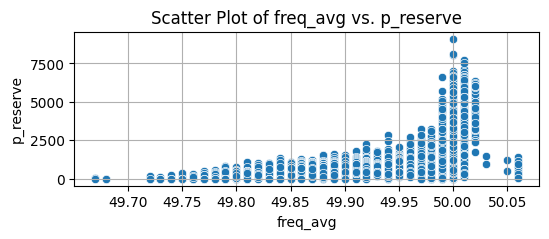

In [62]:
# visualize freq_avg vs. p_reserve
plt.figure(figsize=(6,2))
sns.scatterplot(x='freq_avg', y='p_reserve', data=df)
plt.title('Scatter Plot of freq_avg vs. p_reserve')
plt.xlabel('freq_avg')
plt.ylabel('p_reserve')
plt.grid(True)
plt.show()
# Thus, the frequency drop occurs in the lower performance of power plant storage.

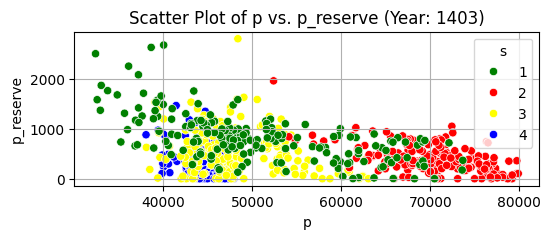

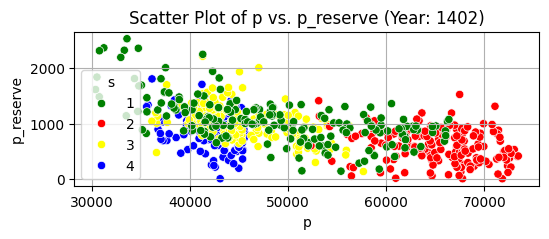

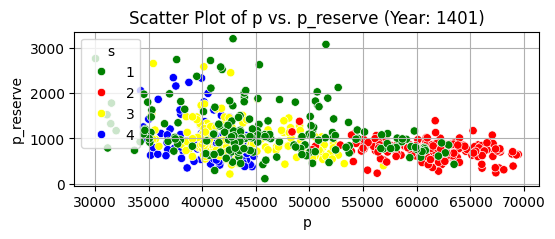

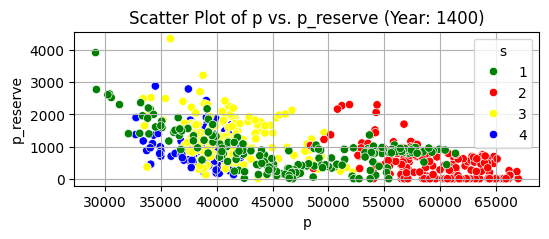

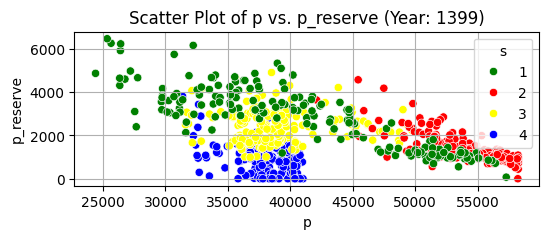

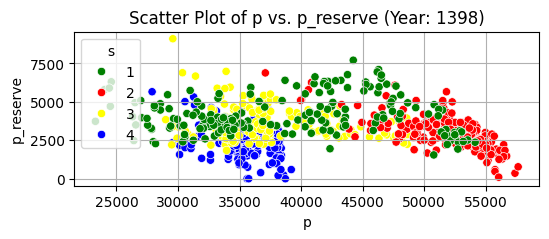

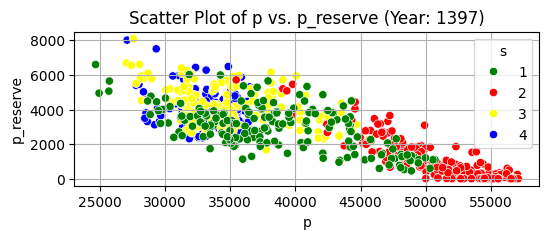

In [66]:
# The importance of seasonal differences
# Adding a new column named s to df and specify the season of each row
# define a function to get the number of season
def get_season(month):
    if month in [1,2,3]:
        return 1
    elif month in [4,5,6]:
        return 2
    elif month in [7,8,9]:
        return 3
    else:
        return 4

df['s'] = df['month'].apply(get_season)

# visualize p vs. p_reserve colored based on each season for each year
# hue: Grouping variable that will produce points with different colors.
years = df['year'].unique()
for year in years:
    plt.figure(figsize=(6,2))
    sns.scatterplot(data=df[df['year'] == year], x='p', y='p_reserve', hue='s', palette=['green', 'red', 'yellow', 'blue'])
    plt.title(f'Scatter Plot of p vs. p_reserve (Year: {year})')
    plt.xlabel('p')
    plt.ylabel('p_reserve')
    plt.grid(True)
    plt.show()

In [67]:
# Outage risk:
# adding new column to show the time of power cut
def power_cut(r, f):
    if r == 0 and f <= 49.99:
        return 1
    else:
        return 0

df['widespread_off'] = df.apply(lambda x: power_cut(x['p_reserve'], x['freq_avg']), axis=1)

dm_widespread_off = df[df['widespread_off'] == 1]
dm_widespread_off = dm_widespread_off.groupby(['year', 'month']).agg(p_min=('p', 'min'), p_max=('p', 'max')).reset_index()

dm_widespread_off['difference_level'] = dm_widespread_off['p_max'] - dm_widespread_off['p_min']
dm_widespread_off

,year,month,p_min,p_max,difference_level
0,1397,4,52682.0,56552.0,3870.0
1,1398,11,35612.0,38722.0,3110.0
2,1399,5,58220.0,58220.0,0.0
3,1399,10,35816.0,41016.0,5200.0
4,1399,12,37863.0,39801.0,1938.0
5,1400,2,46808.0,52745.0,5937.0
6,1400,3,53747.0,55408.0,1661.0
7,1400,4,61714.0,65918.0,4204.0
8,1400,5,57119.0,67012.0,9893.0
9,1400,6,52789.0,64953.0,12164.0


In [ ]:
# p_min:
# نشان می‌دهد که حداقل میزان مصرفی که در ماه و سال مورد نظر منجر به خاموشی گسترده شده است چه مقدار بوده است
# اگر این مقدار کم باشد، می‌تواند نشان‌دهنده ضعف در تامین انرژی در شرایطی باشد که حتی با مصرف کمتر از حالت عادی هم خاموشی رخ داده است
#  این می‌تواند به مشکلات تولید یا انتقال برق مربوط باشد

# p_max
# نشان می‌دهد که حداکثر میزان مصرفی که باعث خاموشی گسترده شده است، چقدر بوده است
# اگر این مقدار زیاد باشد، نشان‌دهنده این است که شبکه برق در شرایط پیک مصرف قادر به تامین نیاز نبوده و در نتیجه خاموشی رخ داده است

# difference_level
# فاصله بین کمترین و بیشترین مقدار مصرف در زمان‌های خاموشی گسترده، نوسانات مصرف را در آن بازه زمانی نشان می‌دهد.
# اگر این فاصله بزرگ باشد، به این معناست که خاموشی گسترده در بازه‌ای وسیع از مقادیر مصرف رخ داده است، و نشان می‌دهد که شبکه برق در آن زمان بسیار حساس بوده است
# اگر این فاصله کوچک باشد این موضوع نشان می‌دهد که شبکه برق تنها در سطح خاصی از مصرف به خاموشی گسترده رسیده است و ممکن است شبکه به یک نقطه بحرانی مشخص حساس باشد

# در تابستان ممکن است ماکزیمم بالاتر باشد به دلیل افزایش مصرف کولرها و سایر وسایل سرمایشی
# در زمستان ممکن است ماکزیمم پایینترو مینیمم و ماکزیمم نزدیک به هم باشند، چون شبکه در فصل سرد به دلایل دیگر دچار خاموشی شده است